In [1]:
!pip install PyMuPDF

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

sns.set_palette('pastel')

In [3]:
filepath = '/Users/jeongseung-a/Desktop/현대자동차_보고서'
filelist = os.listdir(filepath)
filelist

['2013_SUSTAINABILTY.pdf',
 '2019-sustainability-report-0719-ko-f.pdf',
 '2016_SUSTAINABILTY.pdf',
 '2020sr-tcg0807-kor.pdf',
 '2012_SUSTAINABILTY.pdf',
 '2017_SUSTAINABILTY.pdf',
 '2011_SUSTAINABILTY.pdf',
 '2021sr-kor-0910-low.pdf',
 '2008_SUSTAINABILTY.pdf',
 '2014_SUSTAINABILTY.pdf',
 '2023hmc-sr-kor.pdf',
 '2022sr-kor-0714-v08.pdf',
 '2010_SUSTAINABILTY.pdf',
 '2009_SUSTAINABILTY.pdf',
 '2015_SUSTAINABILTY.pdf',
 '.ipynb_checkpoints',
 '2018sr_sustainability_ko_01.pdf']

In [4]:
import fitz
ESG_2008_to_2023 = {}

for i in filelist:
    if i.endswith('.pdf'):  
        path = os.path.join(filepath, i)  
        doc = fitz.open(path)

        search_word = "전기차"
        word_count = 0

        for page in doc:
            text = page.get_text()
            word_count += text.count(search_word)

        ESG_2008_to_2023[i[:4]] = word_count

ESG_2008_to_2023

{'2013': 9,
 '2019': 68,
 '2016': 17,
 '2020': 77,
 '2012': 17,
 '2017': 54,
 '2011': 3,
 '2021': 131,
 '2008': 3,
 '2014': 11,
 '2023': 176,
 '2022': 163,
 '2010': 19,
 '2009': 8,
 '2015': 5,
 '2018': 103}

In [5]:
sorted_ESG_2008_to_2023 = dict(sorted(ESG_2008_to_2023.items(), key=lambda item: int(item[0])))
sorted_ESG_2008_to_2023

{'2008': 3,
 '2009': 8,
 '2010': 19,
 '2011': 3,
 '2012': 17,
 '2013': 9,
 '2014': 11,
 '2015': 5,
 '2016': 17,
 '2017': 54,
 '2018': 103,
 '2019': 68,
 '2020': 77,
 '2021': 131,
 '2022': 163,
 '2023': 176}

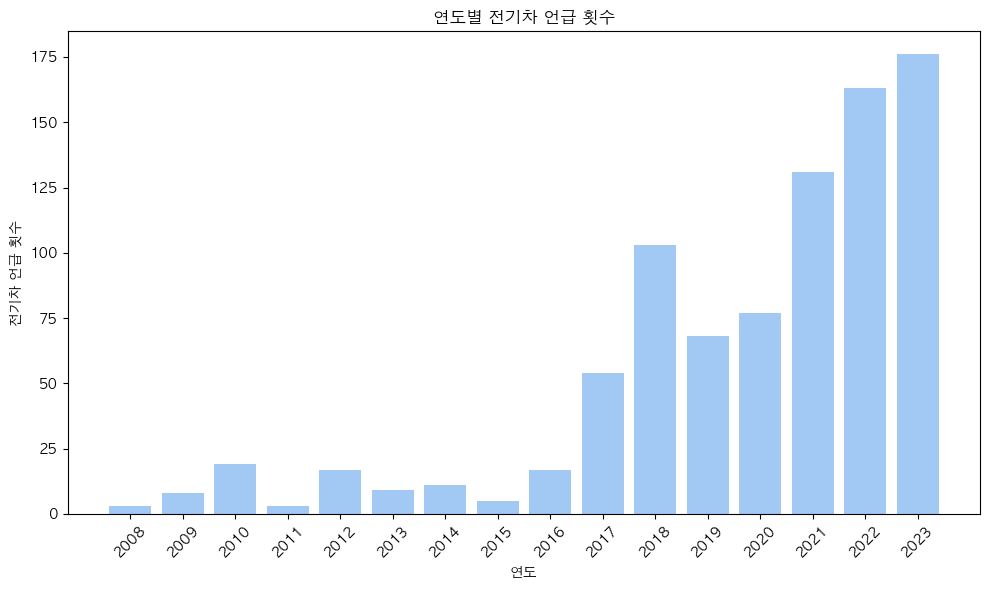

In [6]:
years = list(sorted_ESG_2008_to_2023.keys())
word_counts = list(sorted_ESG_2008_to_2023.values())

plt.figure(figsize=(10, 6))
plt.bar(years, word_counts)
plt.xlabel('연도')
plt.ylabel('전기차 언급 횟수')
plt.title('연도별 전기차 언급 횟수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2017년도부터 전기차에 대한 언급량이 급증한 것을 확인할 수 있다.

## before 2017 vs after 2017

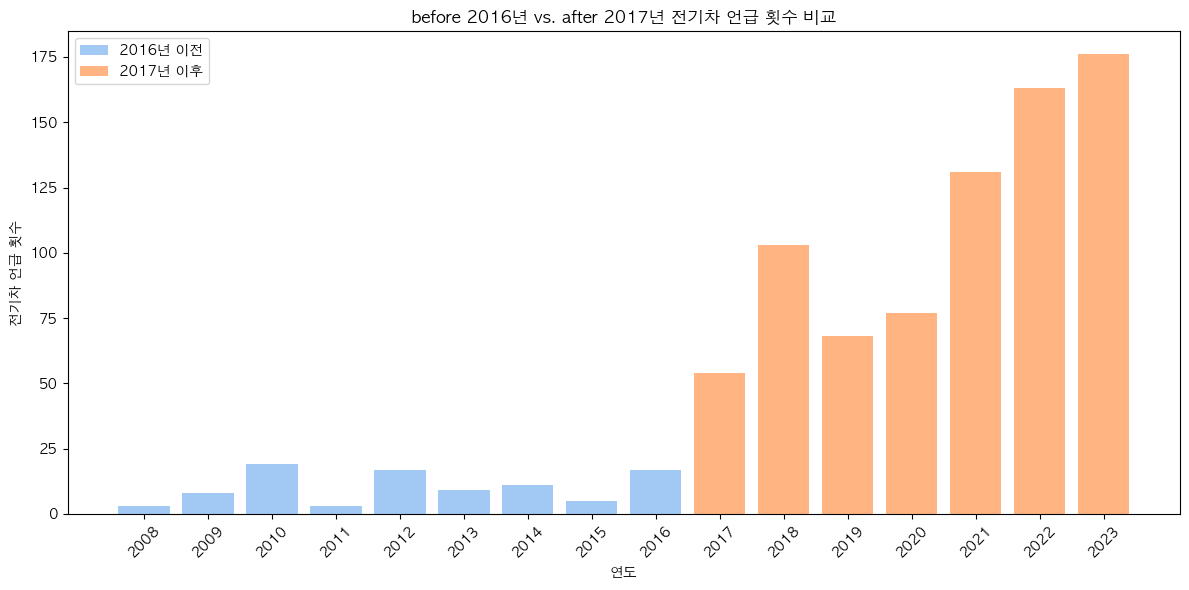

In [7]:
before_2017 = years[:years.index('2017')]
word_counts_before_2017 = word_counts[:len(before_2017)]

after_2017 = years[years.index('2017'):]
word_counts_after_2017 = word_counts[len(before_2017):]

plt.figure(figsize=(12, 6))
plt.bar(before_2017, word_counts_before_2017, label='2016년 이전')
plt.bar(after_2017, word_counts_after_2017, label='2017년 이후')
plt.xlabel('연도')
plt.ylabel('전기차 언급 횟수')
plt.title('before 2016년 vs. after 2017년 전기차 언급 횟수 비교')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

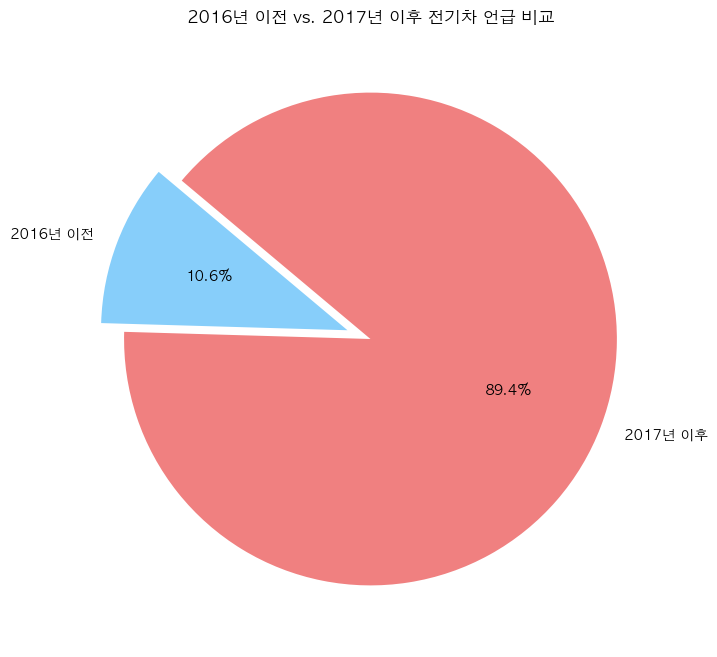

In [8]:
total_word_count_before_2017 = sum(word_counts_before_2017)
total_word_count_after_2017 = sum(word_counts_after_2017)

labels = ['2016년 이전', '2017년 이후']
sizes = [total_word_count_before_2017, total_word_count_after_2017]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0) 

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('2016년 이전 vs. 2017년 이후 전기차 언급 비교') 

plt.show()

## '전기차' 관련 단어와의 비교

In [9]:
#빅카인즈를 이용해서 전기차와 가장 같이 많이 나온 단어들 뽑고 이거랑 전기차랑 비교
#ESG 분석할 때 전기차와 관련된 부분에서 어떤 키워드 변화가 있었는지 보고 이거로 비교해도 좋을듯
#암튼 추후 추가

### ex) ionic

In [10]:
IONIC_2008_to_2023 = {}
for i in filelist:
    if i.endswith('.pdf'):  
        path = os.path.join(filepath, i)  
        doc = fitz.open(path)

        search_word = "아이오닉"
        word_count = 0

        for page in doc:
            text = page.get_text()
            word_count += text.count(search_word)

        IONIC_2008_to_2023[i[:4]] = word_count

IONIC_2008_to_2023

{'2013': 0,
 '2019': 26,
 '2016': 45,
 '2020': 27,
 '2012': 0,
 '2017': 111,
 '2011': 0,
 '2021': 36,
 '2008': 0,
 '2014': 0,
 '2023': 72,
 '2022': 83,
 '2010': 0,
 '2009': 0,
 '2015': 0,
 '2018': 58}

In [11]:
sorted_IONIC_2008_to_2023 = dict(sorted(IONIC_2008_to_2023.items(), key=lambda item: int(item[0])))
sorted_IONIC_2008_to_2023

{'2008': 0,
 '2009': 0,
 '2010': 0,
 '2011': 0,
 '2012': 0,
 '2013': 0,
 '2014': 0,
 '2015': 0,
 '2016': 45,
 '2017': 111,
 '2018': 58,
 '2019': 26,
 '2020': 27,
 '2021': 36,
 '2022': 83,
 '2023': 72}

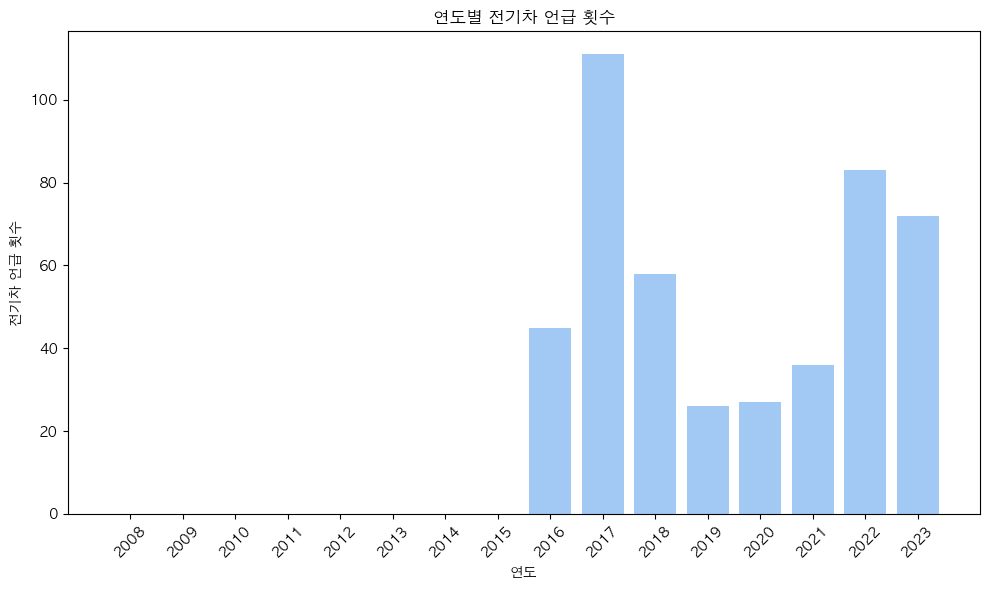

In [12]:
years_I = list(sorted_IONIC_2008_to_2023.keys())
word_counts_I = list(sorted_IONIC_2008_to_2023.values())

plt.figure(figsize=(10, 6))
plt.bar(years_I, word_counts_I)
plt.xlabel('연도')
plt.ylabel('전기차 언급 횟수')
plt.title('연도별 전기차 언급 횟수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

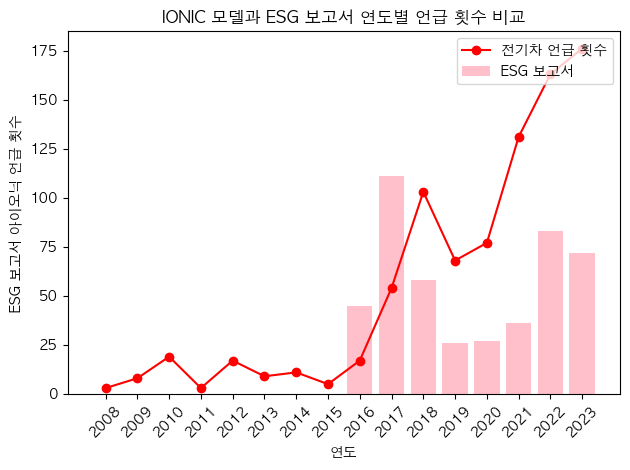

In [13]:
plt.plot(years, word_counts, marker='o', label='전기차 언급 횟수',color='red')
plt.xlabel('연도')
plt.ylabel('ESG 보고서 전기차 언급 횟수')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.bar(years_I, word_counts_I, label='ESG 보고서',color='pink')
plt.xlabel('연도')
plt.ylabel('ESG 보고서 아이오닉 언급 횟수')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

plt.title('IONIC 모델과 ESG 보고서 연도별 언급 횟수 비교')
plt.tight_layout()
plt.show()
